In [214]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ tệp

In [215]:
df_train=pd.read_csv('train_data .csv')
df_test=pd.read_csv('test_data.csv')

In [216]:
df_train.head()

,Unnamed: 0,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay,ketluan_hoichungdown
0,0,36.0,90.0,2.0,61.0,21.0,73.0,1.0,168.0,0.733426,1.769419,1.441032,1.0
1,1,19.0,88.0,2.0,56.0,19.0,75.0,1.0,153.0,0.760000,1.190000,1.200000,1.0
2,2,36.0,85.0,2.0,80.6,26.0,99.0,1.0,151.0,0.750698,2.926852,2.973212,2.0
3,3,39.0,96.0,2.0,77.0,25.0,92.0,1.0,178.0,0.476000,2.286000,1.800000,1.0
4,4,25.0,115.0,2.0,54.0,19.0,70.0,1.0,170.0,0.793024,1.507242,1.601917,1.0


In [217]:
df_train.tail()

,Unnamed: 0,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay,ketluan_hoichungdown
1727,1727,29.0,87.0,2.0,57.4,20.0,74.0,1.0,164.0,0.810323,2.414203,2.862057,2.0
1728,1728,29.0,85.0,2.0,53.0,20.0,74.0,1.0,148.0,1.300000,2.460000,2.000000,1.0
1729,1729,24.0,84.0,2.0,47.0,17.0,64.0,1.0,165.0,0.873329,1.221151,1.561046,1.0
1730,1730,23.0,86.0,2.0,65.0,23.0,82.0,1.0,154.0,1.100000,1.110000,1.500000,1.0
1731,1731,44.0,90.0,2.0,75.0,24.0,87.0,1.0,151.0,0.701251,3.112809,2.784760,2.0


In [218]:
df_test.tail()

,stt,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay,ketluan_hoichungdown
429,429,30.0,91.0,2.0,62.000000,22.0,77.000000,1.0,158.0,0.380000,1.450000,1.100000,1.0
430,430,26.0,84.0,2.0,58.000000,19.0,70.308997,1.0,160.0,0.489000,1.375000,3.600000,2.0
431,431,25.0,89.0,2.0,58.000000,18.0,67.000000,1.0,180.0,0.920000,0.660000,1.400000,1.0
432,432,30.0,92.0,2.0,59.889133,19.0,71.000000,1.0,163.0,0.767280,2.495619,2.767722,2.0
433,433,31.0,91.0,2.0,71.000000,22.0,82.000000,1.0,153.0,0.760353,1.794526,1.563376,1.0


In [219]:
df_train=df_train.drop("Unnamed: 0",axis=1)
df_train["ketluan_hoichungdown"]=df_train["ketluan_hoichungdown"]-1
df_train['tiensusinhconhoichungdown']=df_train['tiensusinhconhoichungdown']-1
df_train['mat_moimui']=df_train['mat_moimui']-1

In [220]:
df_test=df_test.drop("stt",axis=1)
df_test["ketluan_hoichungdown"]=df_test["ketluan_hoichungdown"]-1
df_test['tiensusinhconhoichungdown']=df_test['tiensusinhconhoichungdown']-1
df_test['mat_moimui']=df_test['mat_moimui']-1

## Thông tin về dataset
- tuoi_me_new: Tuổi của mẹ khi mang thai, là thông tin quan trọng liên quan đến tuổi của thai nhi và nguy cơ sinh con có hội chứng Down.
- tuoi_thai_new: Tuổi của thai nhi, thông thường được tính từ thời điểm bắt đầu thai kỳ. Tuổi này có thể liên quan đến mức độ phát triển của thai nhi và nguy cơ hội chứng Down.
- tiensusinhconhoichungdown: Thông tin về việc có bất kỳ tiến triển nào liên quan đến hội chứng Down trong thai kỳ, chẳng hạn như kết quả xét nghiệm hay các dấu hiệu lâm sàng.
- chieudaidaumong: Đo lường chiều dài đầu mông của thai nhi, được sử dụng để đánh giá tình trạng phát triển thai nhi.
- dau_duongkinhluongdinh: Đo lường kích thước đường kính lưỡng dịch (amniotic fluid index - AFI) trong thai kỳ, dùng để đánh giá sức khỏe của thai nhi và thai phụ.
- dau_chuvidau: Đo lường kích thước đầu chu vi đầu của thai nhi, thông tin này cũng liên quan đến tình trạng phát triển của thai nhi.
- mat_moimui: Ghi chép về các dấu hiệu của mắt, mũi, miệng của thai nhi, có thể dùng để kiểm tra các dấu hiệu bất thường liên quan đến hội chứng Down.
- nguc_nhiptimthai: Đo lường kích thước ngực và tim của thai nhi, thông tin này có thể phản ánh tình trạng sức khỏe của thai nhi.
- d_mom_pappa: Thông tin liên quan đến các điểm tựa trong gia đình. Trong gia đình có ai bị hội chứng Down chưa.
- d_mom_hcgb: Mức độ hoocmon beta hCG trong máu của mẹ, thường được sử dụng để đánh giá nguy cơ hội chứng Down ở thai nhi.
- d_khoangsangsaugay: Kết quả đo khoảng cách từ màng phôi đến đỉnh cơ đầu (cervical length) trong thai kỳ, có liên quan đến nguy cơ sinh non hay không.
- ketluan_hoichungdown: Kết luận về khả năng thai nhi có mắc hội chứng Down hay không, thông thường dựa trên kết quả các xét nghiệm và đánh giá sức khỏe của thai nhi trong thai kỳ.

# Visualizing Data

In [221]:
df_train['ketluan_hoichungdown'].value_counts()

0.0    1475
1.0     257
Name: ketluan_hoichungdown, dtype: int64

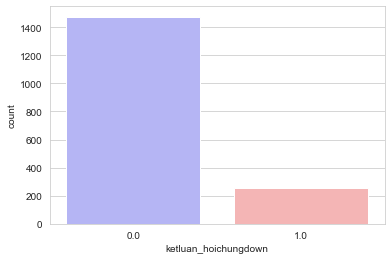

In [222]:
sns.countplot(x="ketluan_hoichungdown", data=df_train, palette="bwr")
plt.show()

In [223]:
print(df_train['ketluan_hoichungdown'].value_counts(normalize=True)*100, "%")

0.0    85.161663
1.0    14.838337
Name: ketluan_hoichungdown, dtype: float64 %


In [224]:
df_train.groupby('ketluan_hoichungdown').mean()

,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay
ketluan_hoichungdown,,,,,,,,,,,
0.0,29.826441,89.482034,0.990508,62.086172,20.873331,77.217005,0.001356,161.898058,0.800380,1.608585,1.564785
1.0,31.789883,90.552529,0.988327,64.292779,21.331476,78.027044,0.035019,159.843448,0.713355,2.672573,2.855558


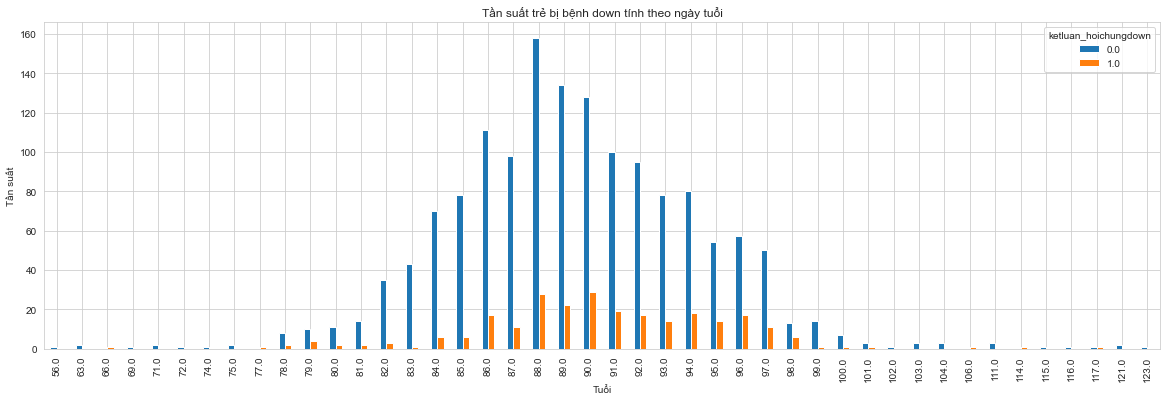

In [225]:
pd.crosstab(df_train.tuoi_thai_new,df_train.ketluan_hoichungdown).plot(kind="bar",figsize=(20,6))
plt.title('Tần suất trẻ bị bệnh down tính theo ngày tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

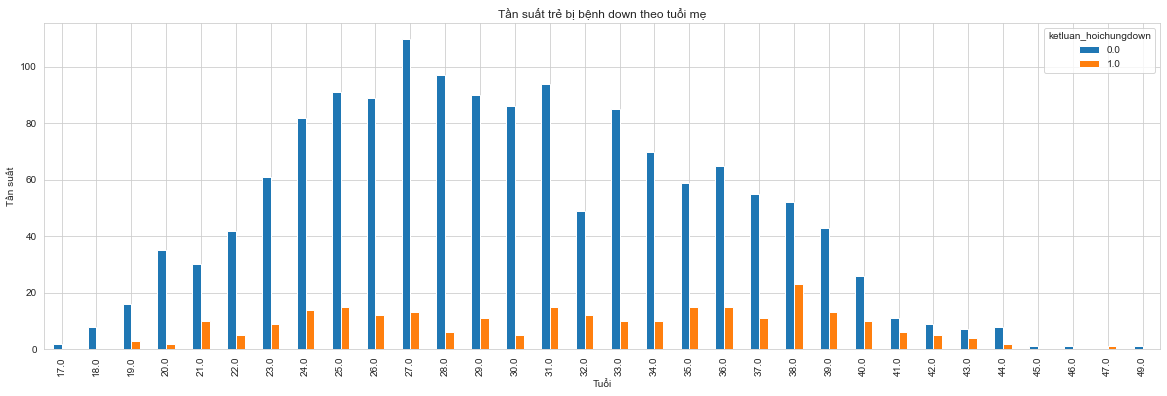

In [226]:
pd.crosstab(df_train.tuoi_me_new,df_train.ketluan_hoichungdown).plot(kind="bar",figsize=(20,6))
plt.title('Tần suất trẻ bị bệnh down theo tuổi mẹ')
plt.xlabel('Tuổi')
plt.ylabel('Tần suất')
plt.show()

# Xử lí dữ liệu khuyết thiếu

In [227]:
column_names = df_train.columns
column_names

Index(['tuoi_me_new', 'tuoi_thai_new', 'tiensusinhconhoichungdown',
       'chieudaidaumong', 'dau_duongkinhluongdinh', 'dau_chuvidau',
       'mat_moimui', 'nguc_nhiptimthai', 'd_mom_pappa', 'd_mom_hcgb',
       'd_khoangsangsaugay', 'ketluan_hoichungdown'],
      dtype='object')

In [228]:
def display_missing(df,features_columns):
    n_rows=df_train.shape[0]
    for col in features_columns:
        missing_count=df_train[col].isnull().sum()
        if missing_count>0:
            print(f"{col} has {missing_count} missing values")
print("Train:",display_missing(df_train,column_names))
print("Test:",display_missing(df_test,column_names))

Train: None
Test: None


# Đưa về dữ liệu về cùng 1 dạng MinMaxScaler

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Lấy danh sách tên các cột trong DataFrame (trừ cột 'ketluan_hoichungdown')
columns_to_normalize = df_train.columns[df_train.columns != 'ketluan_hoichungdown']
# Chuẩn hóa các cột trừ cột 'ketluan_hoichungdown'
df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])

In [230]:
columns_to_normalize_test = df_test.columns[df_test.columns != 'ketluan_hoichungdown']
df_test[columns_to_normalize_test] = scaler.fit_transform(df_test[columns_to_normalize_test])

In [231]:
df_train.head(10)

,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay,ketluan_hoichungdown
0,0.59375,0.507463,1.0,0.406529,0.380952,0.333333,0.0,0.615385,0.187081,0.165453,0.164987,0.0
1,0.06250,0.477612,1.0,0.328350,0.285714,0.360000,0.0,0.384615,0.194149,0.108028,0.119850,0.0
2,0.59375,0.432836,1.0,0.712989,0.619048,0.680000,0.0,0.353846,0.191675,0.280164,0.451912,1.0
3,0.68750,0.597015,1.0,0.656700,0.571429,0.586667,0.0,0.769231,0.118617,0.216650,0.232210,0.0
4,0.25000,0.880597,1.0,0.297079,0.285714,0.293333,0.0,0.646154,0.202932,0.139469,0.195116,0.0
5,0.62500,0.567164,1.0,0.625429,0.523810,0.560000,0.0,0.369231,0.189156,0.191797,0.194742,0.0
6,0.40625,0.477612,1.0,0.281443,0.333333,0.360000,0.0,0.569231,0.247340,0.163528,0.101124,0.0
7,0.50000,0.432836,1.0,0.311151,0.333333,0.320941,0.0,0.553846,0.206913,0.236735,0.425082,1.0
8,0.43750,0.477612,1.0,0.297079,0.190476,0.173333,0.0,0.400000,0.204263,0.233749,0.403196,1.0
9,0.28125,0.492537,1.0,0.359622,0.380952,0.400000,0.0,0.446154,0.156915,0.034688,0.157303,0.0


In [232]:
df_train.shape

(1732, 12)

In [233]:
df_test.shape

(434, 12)

In [234]:
X = df_train.drop(columns=['ketluan_hoichungdown'])
y = df_train["ketluan_hoichungdown"]

X


,tuoi_me_new,tuoi_thai_new,tiensusinhconhoichungdown,chieudaidaumong,dau_duongkinhluongdinh,dau_chuvidau,mat_moimui,nguc_nhiptimthai,d_mom_pappa,d_mom_hcgb,d_khoangsangsaugay
0,0.59375,0.507463,1.0,0.406529,0.380952,0.333333,0.0,0.615385,0.187081,0.165453,0.164987
1,0.06250,0.477612,1.0,0.328350,0.285714,0.360000,0.0,0.384615,0.194149,0.108028,0.119850
2,0.59375,0.432836,1.0,0.712989,0.619048,0.680000,0.0,0.353846,0.191675,0.280164,0.451912
3,0.68750,0.597015,1.0,0.656700,0.571429,0.586667,0.0,0.769231,0.118617,0.216650,0.232210
4,0.25000,0.880597,1.0,0.297079,0.285714,0.293333,0.0,0.646154,0.202932,0.139469,0.195116
...,...,...,...,...,...,...,...,...,...,...,...
1727,0.37500,0.462687,1.0,0.350240,0.333333,0.346667,0.0,0.553846,0.207533,0.229356,0.431097
1728,0.37500,0.432836,1.0,0.281443,0.333333,0.346667,0.0,0.307692,0.337766,0.233895,0.269663
1729,0.21875,0.417910,1.0,0.187629,0.190476,0.213333,0.0,0.569231,0.224290,0.111115,0.187462
1730,0.18750,0.447761,1.0,0.469072,0.476190,0.453333,0.0,0.400000,0.284574,0.100099,0.176030


In [235]:
X_test = df_test.drop(columns=['ketluan_hoichungdown'])
y_test = df_test["ketluan_hoichungdown"]

In [236]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1727    1.0
1728    0.0
1729    0.0
1730    0.0
1731    1.0
Name: ketluan_hoichungdown, Length: 1732, dtype: float64

In [237]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=100)

# Kiểm tra trên mô hình

## <font color = "purple">Logistic Regression
### Validation Accuracy: <font color="red">**92.22%**</font>
### Test Accuracy: <font color="yellow">**92.86%**</font>

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
accuracies = {}
accuracies_test={}

lor = LogisticRegression(solver='liblinear',max_iter=1000,verbose=100)
lor.fit(X_train,y_train)
acc = lor.score(X_val,y_val)*100

accuracies['Logistic Regression'] = acc
print("Val Accuracy {:.2f}%".format(acc))

[LibLinear]Val Accuracy 92.22%


In [240]:
y_pred = lor.predict(X_test)

In [241]:
from sklearn.metrics import accuracy_score
accuracy_lor = accuracy_score(y_test, y_pred)
accuracies_test['Logistic Regression'] = accuracy_lor*100
print("Accuracy on test set {:.2f}%".format(accuracy_lor*100))

Accuracy on test set 92.86%


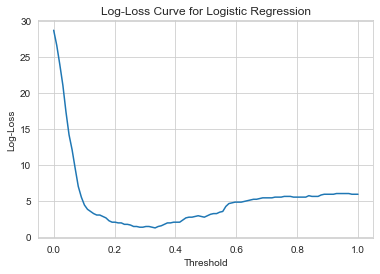

In [242]:
from sklearn.metrics import log_loss
y_pred_prob = lor.predict_proba(X_val)[:, 1]

# Tính giá trị Log-Loss
logloss = log_loss(y_val, y_pred_prob)

# Tạo một danh sách các giá trị ngưỡng từ 0 đến 1
thresholds = np.linspace(0, 1, 100)

# Tính Log-Loss với từng giá trị ngưỡng
logloss_values = []
for threshold in thresholds:
    y_pred_binary = (y_pred_prob > threshold).astype(int)
    logloss_value = log_loss(y_val, y_pred_binary)
    logloss_values.append(logloss_value)

# Vẽ đường cong Log-Loss
plt.plot(thresholds, logloss_values)
plt.xlabel('Threshold')
plt.ylabel('Log-Loss')
plt.title('Log-Loss Curve for Logistic Regression')
plt.show()

## <font color = "purple">K Nearest Neighbors
### Validation Accuracy: <font color="blue">**95.39%**</font>
### Test Accuracy: <font color="white">**94.24%**</font>

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11,weights='distance',p=1,metric='manhattan',algorithm='brute')  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_val)
accuracies['KNN'] = prediction
print("{} NN Score: {:.2f}%".format(11, knn.score(X_val, y_val)*100))

11 NN Score: 95.97%


In [244]:
y_knn_pred=knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_knn_pred)
accuracies_test['KNN'] = accuracy_knn*100
print("Accuracy on test set {:.2f}%".format(accuracy_knn*100))


Accuracy on test set 94.70%


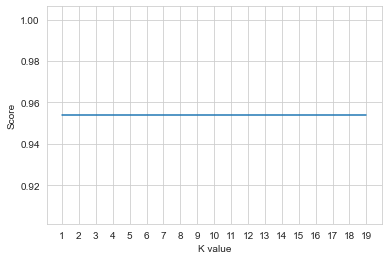

Giá trị KNN lớn nhất là 95.39%


In [245]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = 2,weights='distance',p=1,metric='cityblock')  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_val, y_val.T))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Giá trị KNN lớn nhất là {:.2f}%".format(acc))

## <font color = "purple">Decision Trees
### Validation Accuracy: <font color="blue">**97.12%**</font>
### Test Accuracy: <font color="blue">**92.86%**</font>


In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
dtc = DecisionTreeClassifier(criterion='gini',max_depth=None,random_state=100)
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_val, y_val)
accuracies['Decision Tree'] = acc_dtc*100
print("Decision Tree Test Accuracy {:.2f}%".format(acc_dtc*100))

Decision Tree Test Accuracy 95.97%


In [247]:
y_pred_dtrees=dtc.predict(X_test)
accuracy_dtrees = accuracy_score(y_test, y_pred_dtrees)
accuracies_test['Decision Tree'] = accuracy_dtrees*100
print("Accuracy on test set {:.2f}%".format(accuracy_dtrees*100))
precision = precision_score(y_test, y_pred_dtrees)
recall = recall_score(y_test, y_pred_dtrees)
f1 = f1_score(y_test, y_pred_dtrees)

# In kết quả
print("Precision on test set: {:.2f}".format(precision))
print("Recall on test set: {:.2f}".format(recall))
print("F1-score on test set: {:.2f}".format(f1))

Accuracy on test set 91.94%
Precision on test set: 0.73
Recall on test set: 0.74
F1-score on test set: 0.73


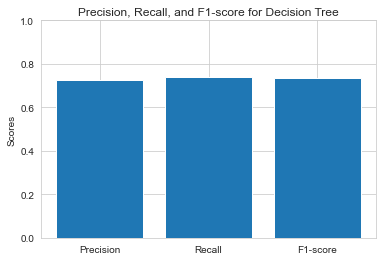

In [248]:
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]

plt.bar(metrics, values)
plt.ylim(0, 1)
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1-score for Decision Tree')
plt.show()

## <font color = "purple">Naive Bayes
### Validation Accuracy: <font color="green">**90.78%**</font>
### Test Accuracy: <font color="green">**94.01%**</font>

In [249]:
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()
nvb.fit(X_train, y_train)

acc_nvb = nvb.score(X_val,y_val)*100
accuracies['Naive Bayes'] = acc_nvb
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nvb))

Accuracy of Naive Bayes: 90.78%


In [250]:
y_pred_nvb=nvb.predict(X_test)
accuracy_nvb = accuracy_score(y_test, y_pred_nvb)
accuracies_test['Naive Bayes'] = accuracy_nvb*100
print("Accuracy on test set {:.2f}%".format(accuracy_nvb*100))

Accuracy on test set 94.01%


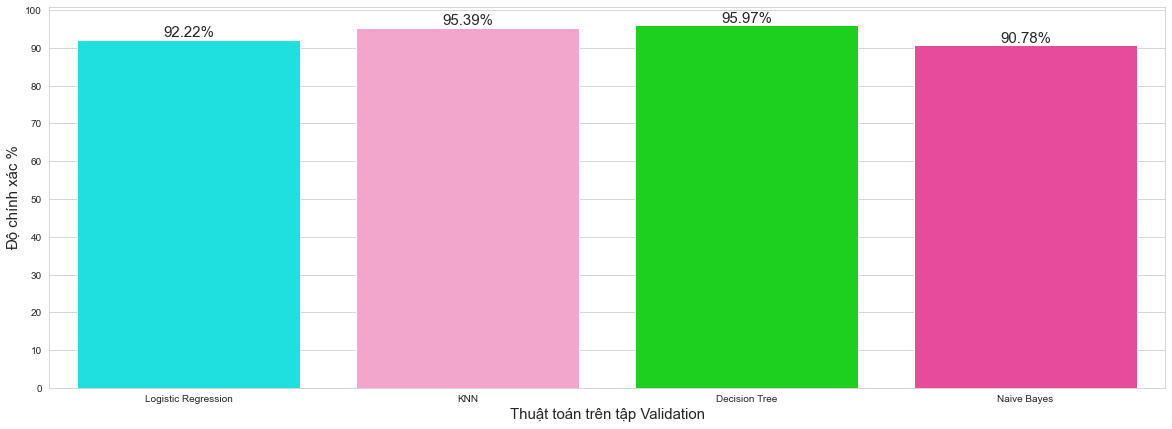

In [251]:
colors = ["#00FFFF", "#FF99CC", "#00EE00", "#FF3399"]

sns.set_style("whitegrid")
plt.figure(figsize=(20, 7))
plt.yticks(np.arange(0, 101, 10),fontsize=10)
plt.ylabel("Độ chính xác %",fontsize=15)
plt.xlabel("Thuật toán trên tập Validation",fontsize=15)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

# Thêm số % lên mỗi cột
for index, value in enumerate(list(accuracies.values())):
    plt.text(index, value, f"{value:.2f}%", ha='center', va='bottom', fontsize=15)

plt.show()

# Confusion Matrix

In [252]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_pred)
cm_knn = confusion_matrix(y_test,y_knn_pred)
cm_nb = confusion_matrix(y_test,y_pred_nvb)
cm_dtc = confusion_matrix(y_test,y_pred_dtrees)

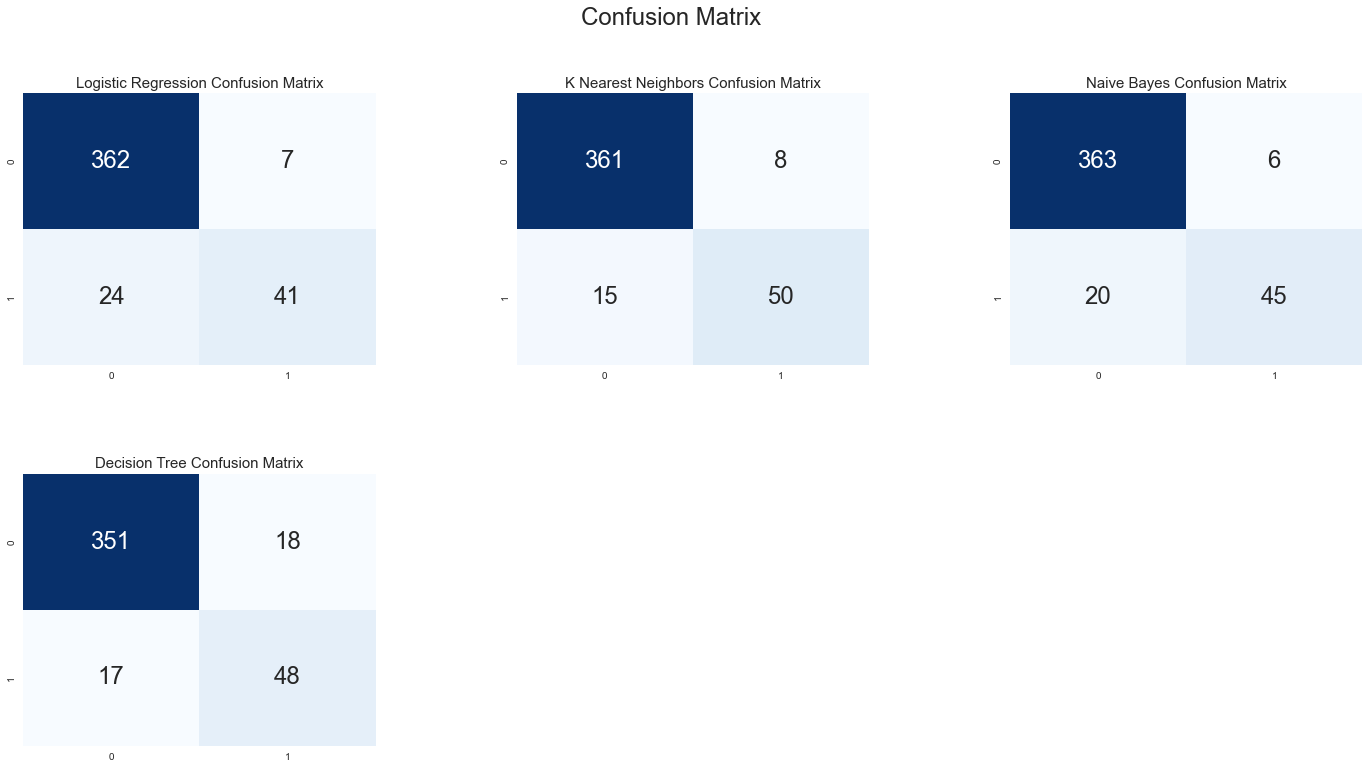

In [253]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrix",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=15)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=15)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes Confusion Matrix",fontsize=15)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Decision Tree Confusion Matrix",fontsize=15)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

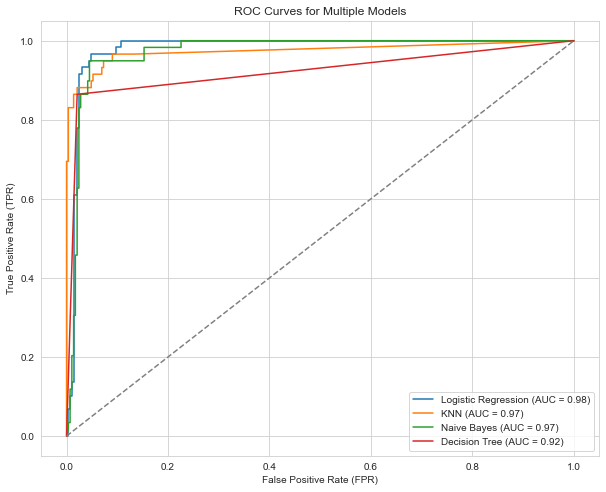

In [254]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất thuộc lớp positive từ mô hình 1
y_pred_prob1 = lor.predict_proba(X_val)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_val, y_pred_prob1)
auc_score1 = roc_auc_score(y_val, y_pred_prob1)

# Dự đoán xác suất thuộc lớp positive từ mô hình 2
y_pred_prob2 = knn.predict_proba(X_val)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_val, y_pred_prob2)
auc_score2 = roc_auc_score(y_val, y_pred_prob2)

# Lặp lại quá trình cho các mô hình khác

y_pred_prob4 = nvb.predict_proba(X_val)[:, 1]
fpr4, tpr4, thresholds4 = roc_curve(y_val, y_pred_prob4)
auc_score4 = roc_auc_score(y_val, y_pred_prob4)

y_pred_prob5 = dtc.predict_proba(X_val)[:, 1]
fpr5, tpr5, thresholds5 = roc_curve(y_val, y_pred_prob5)
auc_score5 = roc_auc_score(y_val, y_pred_prob5)

# Vẽ ROC curve cho tất cả các mô hình trong cùng một đồ thị
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Logistic Regression (AUC = {auc_score1:.2f})')
plt.plot(fpr2, tpr2, label=f'KNN (AUC = {auc_score2:.2f})')
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {auc_score4:.2f})')
plt.plot(fpr5, tpr5, label=f'Decision Tree (AUC = {auc_score5:.2f})')
# Lặp lại với các mô hình khác
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()


In [255]:
import joblib
filename = 'Logistic_Regression.sav'
joblib.dump(lor, filename)
filename2="KNN.sav"
joblib.dump(knn, filename2)
filename3="Naive_Bayes.sav"
joblib.dump(nvb, filename3)
filename4="Decision_Tree.sav"
joblib.dump(dtc,filename4)

['Decision_Tree.sav']

In [256]:
import tkinter as tk
from tkinter import ttk
import joblib
import pandas as pd
from tkinter import messagebox

prediction_enabled = False


# Danh sách các tên model (ví dụ)
model_names = ["Logistic_Regression", "KNN", "Naive_Bayes","Decision_Tree"]

# Lưu danh sách tên model vào tệp .sav
loaded_model = None
# Tạo cửa sổ giao diện
root = tk.Tk()
root.title("Danh sách các model")

label1 = tk.Label(root, text="Tuổi mẹ( năm )")
label1.grid(row=2, column=1, padx=10, pady=10)
label2 = tk.Label(root, text="Tuổi thai (ngày)")
label2.grid(row=2, column=2, padx=10, pady=10)
label3 = tk.Label(root, text="Tiển sử sinh con hội chứng down(0:bị-1:không)")
label3.grid(row=2, column=3, padx=10, pady=10)
label4 = tk.Label(root, text="Chiều dài đầu mông(mm)")
label4.grid(row=4, column=1, padx=10, pady=10)
label5 = tk.Label(root, text="Đường kính lưỡng dịch(mm)")
label5.grid(row=4, column=2, padx=10, pady=10)
label6 = tk.Label(root, text="Chu vi đầu(mm)")
label6.grid(row=4, column=3, padx=10, pady=10)
label7 = tk.Label(root, text="Mắt/môi/mũi(0:bình thương-1:có vấn đề)")
label7.grid(row=4, column=4, padx=10, pady=10)
label8 = tk.Label(root, text="Ngực(mm):")
label8.grid(row=7, column=1, padx=10, pady=10)
label9 = tk.Label(root, text="Tỉ lệ bệnh Down trong gia đình(0<x<1)")
label9.grid(row=7, column=2, padx=10, pady=10)
label10 = tk.Label(root, text="Nồng độ Hoocmon beta hCG-máu mẹ(IU/l)")
label10.grid(row=7, column=3, padx=10, pady=10)
label11 = tk.Label(root, text="Khoảng sáng sau gáy(mm)")
label11.grid(row=7, column=4, padx=10, pady=10)
label12 = tk.Label(root, text="Chọn model")
label12.grid(row=1, column=2, padx=10, pady=10)
# Kích thước ban đầu của cửa sổ
window_width = 700
window_height = 700

# Đặt kích thước và vị trí cửa sổ
root.geometry("1000x500")


# Biến để lưu giá trị từ combo box và Entry widget
selected_model_var = tk.StringVar()
entry_var1 = tk.StringVar()
entry_var2 = tk.StringVar()
entry_var3 = tk.StringVar()
entry_var4 = tk.StringVar()
entry_var5 = tk.StringVar()
entry_var6 = tk.StringVar()
entry_var7 = tk.StringVar()
entry_var8 = tk.StringVar()
entry_var9 = tk.StringVar()
entry_var10 = tk.StringVar()
entry_var11 = tk.StringVar()

# Tạo combo box
combo_box = ttk.Combobox(root, textvariable=selected_model_var, state='readonly')
combo_box.grid(row=1, column=3, padx=10, pady=10)
combo_box['values'] = model_names

# Tạo Entry widget cho việc nhập liệu (Ô nhập liệu 1)
entry_box1 = tk.Entry(root, textvariable=entry_var1)
entry_box1.grid(row=3, column=1, padx=10, pady=10)

# Tạo Entry widget cho việc nhập liệu (Ô nhập liệu 2)
entry_box2 = tk.Entry(root, textvariable=entry_var2)
entry_box2.grid(row=3, column=2, padx=10, pady=10)

# Tạo Entry widget cho việc nhập liệu (Ô nhập liệu 2)
entry_box3 = tk.Entry(root, textvariable=entry_var3)
entry_box3.grid(row=3, column=3, padx=10, pady=10)

# Tạo Entry widget cho việc nhập liệu (Ô nhập liệu 2)
entry_box4 = tk.Entry(root, textvariable=entry_var4)
entry_box4.grid(row=6, column=1, padx=10, pady=10)

entry_box5 = tk.Entry(root, textvariable=entry_var5)
entry_box5.grid(row=6, column=2, padx=10, pady=10)

entry_box6 = tk.Entry(root, textvariable=entry_var6)
entry_box6.grid(row=6, column=3, padx=10, pady=10)

entry_box7 = tk.Entry(root, textvariable=entry_var7)
entry_box7.grid(row=6, column=4, padx=10, pady=10)

entry_box8 = tk.Entry(root, textvariable=entry_var8)
entry_box8.grid(row=9, column=1, padx=10, pady=10)


entry_box9 = tk.Entry(root, textvariable=entry_var9)
entry_box9.grid(row=9, column=2, padx=10, pady=10)

entry_box10 = tk.Entry(root, textvariable=entry_var10)
entry_box10.grid(row=9, column=3, padx=10, pady=10)

entry_box11 = tk.Entry(root, textvariable=entry_var11)
entry_box11.grid(row=9, column=4, padx=10, pady=10)
# Hàm được gọi khi chọn một model trong combo box
def on_model_select(event):
    global prediction_enabled
    global loaded_model  # Khai báo "loaded_model" ở đây để truy cập từ các hàm khác
    global selected_model

    selected_model = selected_model_var.get()
    print(f"Bạn đã chọn model: {selected_model}")

    try:
        # Load mô hình tương ứng với model đã chọn
        model_file_path = f"{selected_model}.sav"
        loaded_model = joblib.load(model_file_path)

    except FileNotFoundError:
        messagebox.showerror("Lỗi", f"Tệp mô hình {selected_model} không được tìm thấy!")
        return

    except Exception as e:
        messagebox.showerror("Lỗi", f"Đã xảy ra lỗi khi tải mô hình {selected_model}:\n{str(e)}")
        return

    prediction_enabled = False

# Khi chọn một model trong combo box, gọi hàm on_model_select
combo_box.bind('<<ComboboxSelected>>', on_model_select)

def on_confirm_button_click():
    prediction_enabled = True
    if prediction_enabled:
        additional_info1 = entry_var1.get()

        additional_info2 = entry_var2.get()
        additional_info3 = entry_var3.get()
        additional_info4 = entry_var4.get()
        additional_info5 = entry_var5.get()
        additional_info6 = entry_var6.get()
        additional_info7 = entry_var7.get()
        additional_info8 = entry_var8.get()
        additional_info9 = entry_var9.get()
        additional_info10 = entry_var10.get()
        additional_info11 = entry_var11.get()

        # Tạo một danh sách chứa các giá trị nhập liệu
        data_test = [
            float(additional_info1),
            float(additional_info2),
            float(additional_info3),
            float(additional_info4),
            float(additional_info5),
            float(additional_info6),
            float(additional_info7),
            float(additional_info8),
            float(additional_info9),
            float(additional_info10),
            float(additional_info11)
        ]

        columns = ["tuoi_me_new","tuoi_thai_new","tiensusinhconhoichungdown","chieudaidaumong","dau_duongkinhluongdinh","dau_chuvidau","mat_moimui","nguc_nhiptimthai","d_mom_pappa","d_mom_hcgb","d_khoangsangsaugay"]
        # Chuyển danh sách thành DataFrame
        df2 = pd.DataFrame([data_test], columns=columns)

        # Thực hiện dự đoán
        prediction = loaded_model.predict(df2)
        if (prediction[0]==0):
            a="Bình thường"
        else:
            a="Có vấn đề"
        messagebox.showinfo("Kết quả dự đoán", f"Kết quả dự đoán của model {selected_model}: {a}")

    prediction_enabled = True

def reset():
    entry_var1.set("")
    entry_var2.set("")
    entry_var3.set("")
    entry_var4.set("")
    entry_var5.set("")
    entry_var6.set("")
    entry_var7.set("")
    entry_var8.set("")
    entry_var9.set("")
    entry_var10.set("")
    entry_var11.set("")

# Tạo nút xác nhận
confirm_button = tk.Button(root, text="Tính", command=on_confirm_button_click)
confirm_button.grid(row=12, column=2, columnspan=2, padx=20, pady=20)

confirm_button2 = tk.Button(root, text="Reset", command=reset)
confirm_button2.grid(row=12, column=3, columnspan=2, padx=20, pady=20)

root.mainloop()


Bạn đã chọn model: Decision_Tree
